# Using the Relaxation Method to Solve Laplace’s Equation

Numerical solutions to many physical problems can be found using finite difference methods. In this approach, a regular grid is imposed on a region. At each point on the grid, the differential equation governing the system is approximated. The resulting equations are then solved iteratively. The relaxation method is a relatively simple example. The problem is to find the potential <i>V</i> in empty regions (<i>ρ</i> = 0) when <i>V</i> is known on the boundaries. In other words, we want to find solutions to Laplace’s equation (we’ll concentrate on two-dimensional problems),
$$\frac{\partial^2 V}{\partial x^2}+\frac{\partial^2 V}{\partial y^2}=0.$$
The value of <i>V</i> at a point (<i>x</i>,<i>y</i>) is the average of the values of <i>V</i> on a circle centered around that point,
$$ V(x,y) = \frac{1}{2\pi R}\oint_{\rm{circle}}V d\ell.$$
This suggests that if <i>V</i> is known for points on a grid, the value of <i>V</i> at each point should be the average of <i>V</i> for its nearest neighbors. A solution can be found by cycling through the points on the grid and assigning to each one the average of it neighbors. On each subsequent pass, the updated values are used. After a few iterations, the values change less on each subsequent pass. Eventually, the changes are negligible and a numerical solution has been reached.  
  
First, we need to be able to keep track of the potential at points on a grid. In Python, **`V[3,2]`** refers to an element in a matrix. The first index is for the row, which we’ll associate with the <i>y</i> direction, and the second index is for the column, which we’ll associate with the <i>x</i> direction. The example below shows the elements of a 5x6 matrix. Notice that the lowest value of each index is zero, not one. Each cell in the matrix **`V`** will represent the value of the potential a point in space. We will divide up the region so that the distance <i>d</i> between the points is the same in both directions. The shading in the diagram will be explained later.

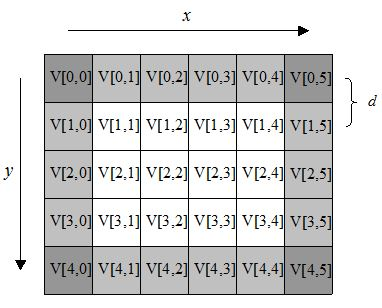

In [2]:
from IPython.display import Image
Image(filename="relaxation.jpg")

We will use the variables **`NX`** and **`NY`** to for the numbers of cells in the <i>x</i> and <i>y</i> directions. If the distance between the first cell and the last cell in the <i>x</i> direction is **`Nd`**, the matrix must have (<i>N</i> + 1) columns. In the figure above, the distance from the first column to the last column is 5<i>d</i>, so there must be **`NX`**=6 columns.  
  
Second, we need to be able to calculate (approximate) second derivatives with respect to <i>x</i> and <i>y</i>. The first derivative with respect to <i>x</i> halfway between the locations of **`V[i,j]`** and **`V[i,j+1]`** can be approximated as
$$\frac{\partial V}{\partial x}\approx\frac{\Delta V}{\Delta x}=\frac{V[i,j+1]-V[i,j]}{d}.$$
The second derivative with respect to x at the location of V[i,j] can be approximated as
$$\frac{\partial^2 V}{\partial x^2}\approx
\frac{1}{d}\left[\frac{V[i,j+1]-V[i,j]}{d}-\frac{V[i,j]-V[i,j-1]}{d}\right]
=\frac{V[i,j+1]-2V[i,j]+V[i,j-1]}{d^2} $$
Similarly, the second derivative with respect to <i>y</i> at the location of **`V[i,j]`** is approximately
$$\frac{\partial^2 V}{\partial x^2}\approx
\frac{V[i+1,j]-2V[i,j]+V[i-1,j]}{d^2} $$
The two-dimensional version of Laplace’s equation will be approximately satisfied if
$$\frac{V[i,j+1]-2V[i,j]+V[i,j-1]}{d^2} + \frac{V[i+1,j]-2V[i,j]+V[i-1,j]}{d^2} \approx 0$$
so
$$ V[i,j]\approx \frac{V[i,j+1]+V[i,j-1]+V[i+1,j]+V[i-1,j]}{4}$$

In other words, the value of the potential should be approximately equal to the average of the values in the four closest positions.  
  
Finally, we need to know how to apply the condition above iteratively to find a solution. The potential is set for the boundary cells (the ones shaded gray in the figure above) and all of the other cells are initially set to zero. The values are updated iteratively to reach a solution. One iteration consists of updating the values of each of the non-boundary cells using the condition above. The latest available value of each <i>V</i> on the right-hand side of the equation is used. The “difference” between two iterations (**`diff`**) is defined as the maximum of the absolute value of the difference between values of potential for all cells. More iterations are performed until the difference between the last two iterations reaches a specified value (**`maxdiff`**).  
  
Note that the darker gray cells in the corners of the figure are not used in the calculation. However, the value entered in those cells may change the appearance of a contour plot of the results.  
  
The example program shown below uses the relaxation method to solve Laplace’s
equation with the following boundary conditions:
$$ 
V=0 \rm{\ at\ }y=-2\rm{\ cm}\\
V=0 \rm{\ at\ }y=2\rm{\ cm}\\
V=0 \rm{\ at\ }x=0\rm{\ cm}\\
V=1\rm{\ V} \rm{\ at\ }x=5\rm{\ cm}
$$
A spacing of <i>d</i> = 1 cm is used, so the matrix is the same size as the one shown in the
figure above.

In [4]:
from numpy import * #includes the zeros function

NX = 6
NY = 5
maxdiff = 1e-6
diff = 1.0 # must start bigger than 'maxdiff'
V = zeros((NY,NX),float) # fill 'V' with zeros

# Enter the boundary conditions for 'V' other than 0
for i in arange(0,NY,1): # j from 0 to NY-1
    V[i,NX-1] = 1.0
print(V) # print the starting values

while diff > maxdiff: # repeat until 'diff' is small
    diff = 0.0 # reset for each iteration
    # Loop over all of the interior points
    for i in arange(1,NY-1,1): # i from 1 to NY-2
        for j in arange(1,NX-1,1): # j from 1 to NX-2
            newVij = (V[i-1,j]+V[i+1,j]
                      +V[i,j-1]+V[i,j+1])/4.0
            lastdiff = abs(newVij-V[i,j])
            if lastdiff > diff:
                diff = lastdiff
            V[i,j] = newVij
print(V)

[[ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.]]
[[ 0.          0.          0.          0.          0.          1.        ]
 [ 0.          0.03346891  0.08708074  0.19460784  0.43131878  1.        ]
 [ 0.          0.04679614  0.12024742  0.2600326   0.53066754  1.        ]
 [ 0.          0.03346922  0.08708112  0.19460813  0.43131892  1.        ]
 [ 0.          0.          0.          0.          0.          1.        ]]


For each iteration, only the interior (non-boundary) cells are updated. The new value of **`V[i,j]`** is temporarily stored in the variable **`newVij`** so that it can be compared with the old value. If the difference between them (**`lastdiff`**) is bigger than any previous differences for the current iteration, it becomes the new value of the difference (**`diff`**).  
  
You can use the **`contour`** function (or **`contourf`**) from the pylab library to display the results of the calculations.

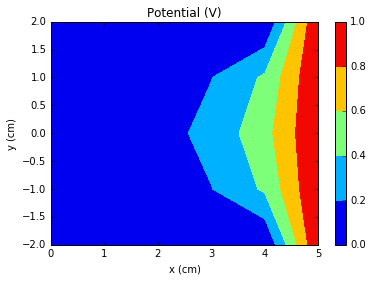

In [6]:
from pylab import *

xlist = linspace(0.0,5.0,NX)
ylist = linspace(-2.0,2.0,NY)
X,Y = meshgrid(xlist,ylist)
levels = linspace(0.0, 1.0, 6)

figure()
CP = contourf(X,Y,V,levels)
colorbar(CP)
xlabel('x (cm)')
ylabel('y (cm)')
title('Potential (V)')
show()

The rate of convergence to a solution can often be improved by “overrelaxation.” The condition above can be rewritten as
$$V[i,j]\approx w\frac{V[i,j+1]+V[i,j-1]+V[i+1,j]+V[i-1,j]}{4} +(1-w)V[i,j],$$
where <i>w</i> is a nonzero constant. Since the two conditions are equivalent, the solutions reached using them are the same. When this condition is used, the current value (on the right-hand side) of the potential for a cell is used in the calculation of the new value (on
the left-hand side). A good choice of <i>w</i> can produce much quicker convergence (less iterations are required). For most problems, the optimum value of <i>w</i> cannot be know in advance, but <i>w</i> = 1.5 works well in many cases. If we set <i>w</i> = 1, there is no overrelaxation.

## References

<ol>
<li>David J. Griffiths, <i>Introduction to Electrodynamics</i>, 3rd ed. (Prentice-Hall, Upper Saddle River, NJ, 1999), pp. 113-114.
<li>John R. Reitz, Frederick J. Milford, and Robert W. Christy, <i>Foundations of Electromagnetic Theory</i>, 4th ed. (Addison Wesley, Reading, MA, 1993), pp. 77-84.
<li>Paul Lorrain, Dale R. Corson, and Francois Lorrain, <i>Fundamentals of
Electromagnetic Phenomena</i> (W. H. Freeman, San Francisco, 2000), pp. 174-179.
</ol>